## KNN и Линейная регрессия

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\dognellaf\appdata\local\programs\python\python311\lib\site-packages (2.1.2)




[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from random import uniform
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression


In [6]:
OFFSET_MIN = -0.2
OFFSET_MAX = 0.2

### Задание 1. (30%)
Сгенерировать случайным образом 3 набора данных (см. картинки).

Количество точек в каждом от 100 до 200. 

Цветом обозначены метки классов. 

Для каждого набора данных:

* Разделить датасет на train/test (80/20)
* Обучить и протестировать KNN
* Построить графики точности классификации(на train/test выборках) при разных k(1...8)
* Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру,
построить матрицу расхождений

In [7]:
data = {'x': [],
        'y': [],
        'F': []}

for i in range(75):
    chance = uniform(0, 100)
    x = uniform(-5.0, 5.0)
    y1 = math.sqrt(25 - x ** 2)
    if chance > 50:
        y1 *= -1

    offset = 1 + uniform(OFFSET_MIN, OFFSET_MAX)

    data['x'].append(x * offset)
    data['y'].append(y1 * offset)
    data['F'].append(1)

for i in range(125):
    chance = uniform(0, 100)
    x = uniform(-10.0, 10.0)
    y1 = math.sqrt(100 - x ** 2)
    if chance > 50:
        y1 *= -1

    offset = 1 + uniform(OFFSET_MIN, OFFSET_MAX)
    
    data['x'].append(x * offset)
    data['y'].append(y1 * offset)
    data['F'].append(2)

dataset1 = pd.DataFrame(data)
dataset1

,x,y,F
0,-4.021130,4.449362,1
1,3.370350,-2.277091,1
2,-5.137689,-2.236782,1
3,2.553707,-3.422088,1
4,1.455572,-4.231598,1
...,...,...,...
195,5.591528,-8.035169,2
196,5.757388,-10.414845,2
197,4.313037,-9.676644,2
198,-4.263565,10.266033,2


In [8]:
data = {'x': [],
        'y': [],
        'F': []}

for i in range(50):
    j = 0
    while j < 1:
        x = uniform(j, j + 0.5)
        y = uniform(j, j + 0.5)
        offset = 1 #+ uniform(OFFSET_MIN, OFFSET_MAX)

        data['x'].append(x * offset)
        data['y'].append(y * offset)
        data['F'].append(1)
        j += 0.5

for i in range(50):
    x = uniform(0, 0.5)
    y = uniform(0.5, 1)
    offset = 1 #+ uniform(OFFSET_MIN, OFFSET_MAX)

    data['x'].append(x * offset)
    data['y'].append(y * offset)
    data['F'].append(2)

for i in range(50):
    x = uniform(0.5, 1)
    y = uniform(0, 0.5)
    offset = 1 #+ uniform(OFFSET_MIN, OFFSET_MAX)

    data['x'].append(x * offset)
    data['y'].append(y * offset)
    data['F'].append(2)

dataset2 = pd.DataFrame(data)
dataset2

,x,y,F
0,0.337420,0.390827,1
1,0.568201,0.948339,1
2,0.352520,0.191319,1
3,0.656936,0.521879,1
4,0.278715,0.098277,1
...,...,...,...
195,0.822213,0.479921,2
196,0.678801,0.247280,2
197,0.669501,0.471219,2
198,0.909995,0.018117,2


In [9]:
data = {'x': [],
        'y': [],
        'F': []}

for i in range(100):
    #y=-x^(2)-2x-0.6
    #while x in range()
    x = uniform(-1, 1)
    y = -1 * x ** 2 + 0.3
    data['x'].append(x)
    data['y'].append(y)
    data['F'].append(1)

for i in range(100):
    #y=x^(2)-2x+0.6
    x = uniform(0, 2)
    y = x ** 2 - 2 * x - 0.3
    data['x'].append(x)
    data['y'].append(y)
    data['F'].append(2)

dataset3 = pd.DataFrame(data)
dataset3

,x,y,F
0,-0.898978,-0.508162,1
1,-0.256640,0.234136,1
2,-0.377349,0.157608,1
3,0.527707,0.021525,1
4,-0.563478,-0.017507,1
...,...,...,...
195,0.771577,-1.247823,2
196,0.722455,-1.222969,2
197,0.257615,-0.748864,2
198,0.061069,-0.418409,2


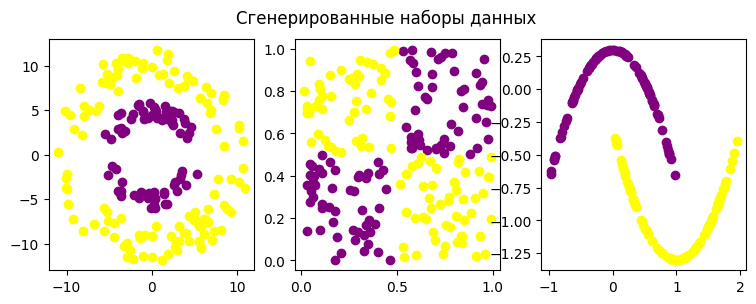

In [10]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
draw_data_11 = dataset1[dataset1["F"] == 1]
draw_data_12 = dataset1[dataset1["F"] == 2]
plt.scatter(y=draw_data_11['y'], x=draw_data_11['x'], color="purple")
plt.scatter(y=draw_data_12['y'], x=draw_data_12['x'], color="yellow")

plt.subplot(132)
draw_data_21 = dataset2[dataset2["F"] == 1]
draw_data_22 = dataset2[dataset2["F"] == 2]
plt.scatter(y=draw_data_21['y'], x=draw_data_21['x'], color="purple")
plt.scatter(y=draw_data_22['y'], x=draw_data_22['x'], color="yellow")

plt.subplot(133)
draw_data_31 = dataset3[dataset3["F"] == 1]
draw_data_32 = dataset3[dataset3["F"] == 2]
plt.scatter(y=draw_data_31['y'], x=draw_data_31['x'], color="purple")
plt.scatter(y=draw_data_32['y'], x=draw_data_32['x'], color="yellow")

plt.suptitle('Сгенерированные наборы данных')
plt.show()

In [11]:
def analysis_KNN(df: pd.DataFrame) -> None:
    # Разделение датасета на train/test (80/20)
    y = df['F']
    X = df.drop('F', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    k_values = range(1, 9)
    train_accuracy = []
    test_accuracy = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)
        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))

    # Построение графиков точности классификации
    plt.plot(k_values, train_accuracy, label='Train Accuracy')
    plt.plot(k_values, test_accuracy, label='Test Accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)

    # Построение матрицы расхождений
    conf_matrix = confusion_matrix(y_test, y_pred)
    result_df = pd.DataFrame(conf_matrix)
    print(result_df)

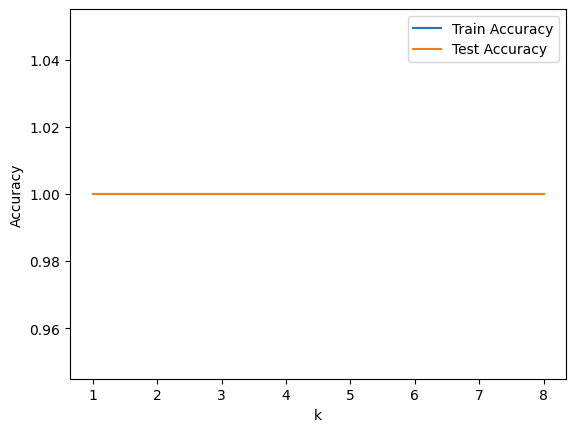

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
    0   1
0  14   0
1   0  26


In [12]:
analysis_KNN(dataset1)

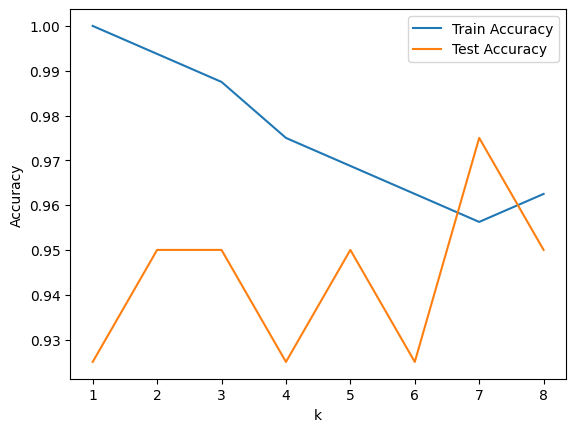

Accuracy: 0.95
Precision: 0.9130434782608695
Recall: 1.0
F1 Score: 0.9545454545454545
    0   1
0  21   0
1   2  17


In [13]:
analysis_KNN(dataset2)

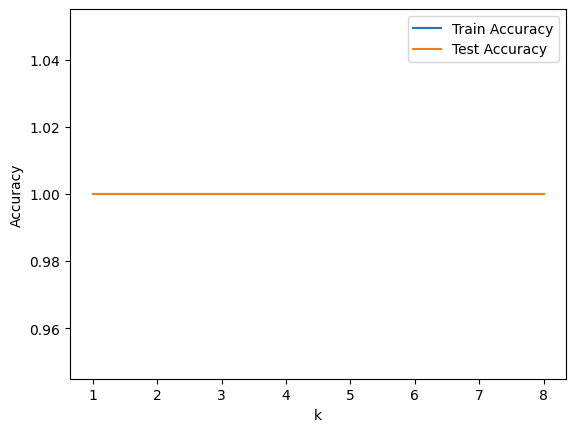

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
    0   1
0  21   0
1   0  19


In [14]:
analysis_KNN(dataset3)

### Задание 2. Метрики (20%)
25 объектов классифицированы на 3 класса
C="Cat"
F="Fish"
H="Hen"

истинные значения

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

результат системы

y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

Написать код на python, который воспроизводит вывод, представленный ниже (не используя сторонние библиотеки, кроме numpy)


In [15]:
import numpy as np

def accuracy(matrix):
    return np.trace(matrix) / np.sum(matrix)

def print_floats(row):
    print("{: >12} {: >12.3f} {: >12.3f} {: >12.3f} {: >12}".format(*row))

def print_accuracy(row):
    print("{: >12} {: >12} {: >12} {: >12.3f} {: >12}".format(*row))

def print_row(row):
    print("{: >12} {: >12} {: >12} {: >12} {: >12}".format(*row))

C = "Cat"
F = "Fish"
H = "Hen"

labels = [C, F, H]
size = len(labels)

y_true = [C, C, C, C, C, C, F, F, F, F, F, F, F, F, F, F, H, H, H, H, H, H, H, H, H]
y_pred = [C, C, C, C, H, F, C, C, C, C, C, C, H, H, F, F, C, C, C, H, H, H, H, H, H]

matrix = np.zeros((size, size), dtype=int)
label_to_index = {label: i for i, label in enumerate(labels)}

for true, pred in zip(y_true, y_pred):
    true_index = label_to_index[true]
    pred_index = label_to_index[pred]
    matrix[true_index][pred_index] += 1

diag = np.diag(matrix)
axis_0_sum = np.sum(matrix, axis=0)
axis_1_sum = np.sum(matrix, axis=1)

precision = diag / axis_0_sum
recall = diag / axis_1_sum
f1_score = 2 * (precision * recall) / (precision + recall)
support = axis_1_sum
support_sum = np.sum(support)

print(matrix)
print()
print_row(["", "precision", "recall", "f1-score", "support"])
print()
for i, label in enumerate(labels):
    print_floats([label, 
                  precision[i], 
                  recall[i], 
                  f1_score[i], 
                  support[i]])

print()
print_accuracy(["accuracy",
       "", 
       "",
       accuracy(matrix), 
       support_sum])

print_floats(["macro avg", 
       np.mean(precision), 
       np.mean(recall), 
       np.mean(f1_score), 
       support_sum])

print_floats(["weighted avg", 
        np.average(precision, weights=support), 
        np.average(recall, weights=support), 
        np.average(f1_score, weights=support), 
        support_sum])

[[4 1 1]
 [6 2 2]
 [3 0 6]]

                precision       recall     f1-score      support

         Cat        0.308        0.667        0.421            6
        Fish        0.667        0.200        0.308           10
         Hen        0.667        0.667        0.667            9

    accuracy                                  0.480           25
   macro avg        0.547        0.511        0.465           25
weighted avg        0.581        0.480        0.464           25


### Задание 3. (50%) Линейная регрессия 
1. Самостоятельно выберите набор данных, над которым вы хотите работать. 
2. Загрузите данные и напишите код, чтобы разбить набор на обучающий и тестовый наборы данных. Выберите как минимум 3 переменных, которые вы можете использовать для прогнозирования значений некоторой целевой переменной в наборе.
3. Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную) линейную  регрессиюдля каждой выбранной переменной.Какая из них дает лучший R2?

In [16]:
# загрузка набора данных
original_df = pd.read_csv("Google-Playstore.csv")
original_df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Blood Pressure Tracker and Diary,com.Rapiddappstudio.bloodpressuretraker,Medical,0.0,0.0,100+,100.0,127,True,0.0,...,NaN,nadimyou96@gmail.com,"Apr 19, 2021","Jun 05, 2021",Everyone,https://nadimyou96.blogspot.com/2021/02/policy...,True,False,False,2021-06-15 21:09:10
49994,Social Work - an offline guide app for students,com.studentsapps.socialwork,Education,4.0,48.0,"10,000+",10000.0,11361,True,0.0,...,https://studentsapps.shelikethis.com/,mebadbashir@gmail.com,"Jan 5, 2020","Nov 25, 2020",Everyone,https://docs.google.com/document/d/16pM_RsZv18...,True,False,False,2021-06-15 21:09:10
49995,뉴써니 수학 기초 1_7,kr.kabook.sunnysuhak7n,Education,0.0,0.0,100+,100.0,120,True,0.0,...,NaN,kabook@naver.com,NaN,"Oct 07, 2019",Everyone,http://svc.kabook.kr/private.html,True,False,False,2021-06-15 21:09:10
49996,ABIMM RT,com.abimm.timeclock,Business,2.8,73.0,"10,000+",10000.0,11895,True,0.0,...,https://www.abico.com,info@abico.com,"Mar 6, 2017","Mar 17, 2021",Everyone,https://www.abico.com/privacy.html,False,False,False,2021-06-15 21:09:10


In [17]:
# датасет с ключевыми переменными
not_free_df = original_df[original_df["Free"] == False]
df = not_free_df[["Category", "Maximum Installs", "Price", "Rating"]]
df.columns = ["Category", "Installs", "Price", "Rating"]
df["Price"] = df["Price"].astype(float)
df["Rating"] = df["Rating"].astype(float)
df["Installs"] = df["Installs"].astype(int)
df["Category"] = pd.Categorical(df["Category"])
df["Category"] = df["Category"].cat.codes
df["Category"] = df["Category"].astype(int)
df = df.reset_index()
del df["index"]
df

C:\Users\DogNellaf\AppData\Local\Temp\ipykernel_5984\2256502593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].astype(float)
C:\Users\DogNellaf\AppData\Local\Temp\ipykernel_5984\2256502593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(float)
C:\Users\DogNellaf\AppData\Local\Temp\ipykernel_5984\2256502593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Category,Installs,Price,Rating
0,39,34125,1.99,4.5
1,37,10407,4.99,2.8
2,39,12019,0.99,3.5
3,15,2,2.99,0.0
4,35,23644,0.99,3.8
...,...,...,...,...
986,13,1654,4.49,4.4
987,11,25681,2.49,3.5
988,43,846,3.99,4.3
989,4,390,3.99,3.6


In [18]:
df = df[~df['Rating'].isnull()]
X = df[["Category", "Installs", "Price"]]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

max_r_2 = -1
max_variable = ""

for variable in X.columns:
    model = LinearRegression()
    model.fit(X_train[[variable]], y_train)
    y_pred_train = model.predict(X_train[[variable]])
    y_pred_test = model.predict(X_test[[variable]])
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = -1 * r2_score(y_test, y_pred_test)
    print(f'R2 for {variable}: Train - {r2_train}, Test - {r2_test}')
    if r2_test > max_r_2:
        max_r_2 = r2_test
        max_variable = variable

print(f"Наивысший показатель r2 ({max_r_2}) на тестовом наборе данных у столбца {max_variable}")
print("Тем не менее, линейная регрессия, судя по показателю, очень плохо подходит для оценки этого набора данных")

R2 for Category: Train - 0.009961185711528597, Test - 0.02227598267401465
R2 for Installs: Train - 0.005397049632659412, Test - 0.005287528773293193
R2 for Price: Train - 0.0027228812818258508, Test - 0.004359789988627183
Наивысший показатель r2 (0.02227598267401465) на тестовом наборе данных у столбца Category
Тем не менее, линейная регрессия, судя по показателю, очень плохо подходит для оценки этого набора данных
